In [47]:
import json
import pandas as pd
import os
from pprint import pprint
import re
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
## Preprosamiento previo. De un gran dataset escogemos 5 subreddits para hacer el analisis grupal e individual
## League of legends

In [3]:
import json
## Data real pero tenemos que procesarla. Tarda por tamaños de archivos

#file_name = 'sample_data.json'
#main_df = pd.read_json(file_name,lines = True)
#data_directory = ".data";
#df = pd.DataFrame()
#for filename in os.listdir(data_directory):        
#    lines = [line.rstrip('\n') for line in open(data_directory + r"\\" + filename)]    
#    jsons_array = []
#    i = 0
#    for line in lines:        
#        line = line.replace("null", "\"\"")                
#        json_string = line
#        try:                                  
#            jsons_array.append(json.loads(json_string))                  
#        except:   
#            continue
            
#    df = pd.DataFrame.from_dict(jsons_array, orient='columns')        


    

## Analizamos la data. Limpiamos y preprocesamos

In [4]:
#df.shape

In [5]:
#df.groupby('subreddit').size()

In [6]:
## Leemos la data de prueba (Para trabajar el modelo inicial)

file_name = 'sample_data.json'

entry_df = pd.read_json(file_name,lines = True)
print(entry_df.shape)
entry_df.head()

(10000, 21)


,author,author_cakeday,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,...,id,is_submitter,link_id,parent_id,permalink,retrieved_on,score,stickied,subreddit,subreddit_id
0,Dethcola,NaN,,Clairemont,A quarry,True,0,1506816000,None,0,...,dnqik14,False,t3_73ieyz,t3_73ieyz,/r/sandiego/comments/73ieyz/best_place_for_gra...,1509189606,3,False,sandiego,t5_2qq2q
1,PennyBotV2,NaN,flair2-penny1,The Bot,[Salutations! I'm not sure what you said.](htt...,True,0,1506816000,None,0,...,dnqik15,False,t3_73g740,t1_dnqiiv7,/r/RWBY/comments/73g740/ruby_gives_greetings_a...,1509189606,3,False,RWBY,t5_2vhg0
2,Sir_Firebum,NaN,HOU-wagon,Astros Bandwagon,I got into baseball at about he same time Matt...,True,0,1506816000,None,0,...,dnqik16,False,t3_73hlwn,t1_dnqc3lu,/r/baseball/comments/73hlwn/matt_cain_in_his_f...,1509189606,2,False,baseball,t5_2qm7u
3,deanzynut,NaN,woodcutting,99 wcing btw,FUCKING TORY,True,0,1506816000,None,0,...,dnqik17,True,t3_73gw9b,t1_dnqdo99,/r/2007scape/comments/73gw9b/carls_platebody/d...,1509189606,18,False,2007scape,t5_2wbww
4,OfullOstomacheO,NaN,None,None,I see a water dragon,True,0,1506816000,None,0,...,dnqik18,False,t3_73i6z3,t3_73i6z3,/r/mildlyinteresting/comments/73i6z3/this_bric...,1509189606,1,False,mildlyinteresting,t5_2ti4h


In [7]:
# Subreddits with more data
subredditTop = entry_df.groupby('subreddit').count().sort_values(by=['subreddit_id'], ascending=False).head(5)
subredditTop

,author,author_cakeday,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,is_submitter,link_id,parent_id,permalink,retrieved_on,score,stickied,subreddit_id
subreddit,,,,,,,,,,,,,,,,,,,,
AskReddit,486,1,0,0,486,486,486,486,9,486,486,486,486,486,486,486,486,486,486,486
CFB,403,1,382,382,403,403,403,403,0,403,403,403,403,403,403,403,403,403,403,403
CrazyIdeas,261,0,0,0,261,261,261,261,0,261,261,261,261,261,261,261,261,261,261,261
news,158,0,0,0,158,158,158,158,0,158,158,158,158,158,158,158,158,158,158,158
ConciseIAmA,147,0,0,0,147,147,147,147,73,147,147,147,147,147,147,147,147,147,147,147


In [8]:
# List of most popular subreddits
subredditList = subredditTop[subredditTop.columns[0]].keys().tolist()
subredditList

['AskReddit', 'CFB', 'CrazyIdeas', 'news', 'ConciseIAmA']

In [9]:
# Dictionary: Reddit_id -> Reddit_name
subredditIdToCode = {}

for subReddit in subredditList:
    subredditIdToCode[subReddit] = entry_df[entry_df.subreddit == subReddit].iloc[0]['subreddit_id']
    
subredditIdToCode

{'AskReddit': 't5_2qh1i',
 'CFB': 't5_2qm9d',
 'ConciseIAmA': 't5_3jana',
 'CrazyIdeas': 't5_2snxj',
 'news': 't5_2qh3l'}

In [10]:
entry_df = entry_df[entry_df['subreddit'].isin(subredditList)] 
print(entry_df.shape)
entry_df.reset_index(drop=True,inplace=True)
entry_df
# We get 14 % of data

(1455, 21)


,author,author_cakeday,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,...,id,is_submitter,link_id,parent_id,permalink,retrieved_on,score,stickied,subreddit,subreddit_id
0,psych4191,NaN,mississippistate-sheet1-row06-col08-eggbowl-2s...,Mississippi State Bulldogs / Egg Bowl,That is some chicken salad outta chicken shit ...,True,0,1506816000,None,0,...,dnqik1c,False,t3_73hgz4,t3_73hgz4,/r/CFB/comments/73hgz4/game_thread_mississippi...,1509189606,2,False,CFB,t5_2qm9d
1,raspberryseltzer,NaN,alabama-sheet1-row06-col01-pennsylvania-2sht1-...,Alabama Crimson Tide / Pennsylvania Quakers,Tequila.,True,0,1506816000,None,0,...,dnqik1e,False,t3_73hgz4,t1_dnqihjg,/r/CFB/comments/73hgz4/game_thread_mississippi...,1509189606,2,False,CFB,t5_2qm9d
2,ithinkisaidtoomuch,NaN,None,None,lets see how deep this rabbit hole goes...,True,0,1506816000,None,0,...,dnqik1j,False,t3_73bnqg,t1_dnqhxny,/r/CrazyIdeas/comments/73bnqg/get_as_many_bots...,1509189606,1,False,CrazyIdeas,t5_2snxj
3,halfhere,NaN,auburn-sheet1-row06-col03-huntingdon-2sht3-2rw...,Auburn Tigers / Huntingdon Hawks,"They act like it’s some crazy idea, and the Fo...",True,0,1506816000,None,0,...,dnqik1r,False,t3_73hgz4,t1_dnqig4x,/r/CFB/comments/73hgz4/game_thread_mississippi...,1509189606,1,False,CFB,t5_2qm9d
4,_TheBro_,NaN,None,None,"OP, what did you do?",True,0,1506816000,None,0,...,dnqik21,False,t3_73i60a,t3_73i60a,/r/AskReddit/comments/73i60a/what_a_guy_should...,1509189606,1,False,AskReddit,t5_2qh1i
5,verbal_pestilence,NaN,None,None,please tell me there's video\n,True,0,1506816001,None,0,...,dnqik2n,True,t3_73iag0,t1_dnqhlv0,/r/AskReddit/comments/73iag0/reddit_married_me...,1509189607,2,False,AskReddit,t5_2qh1i
6,ithinkisaidtoomuch,NaN,None,None,lets see how deep this rabbit hole goes...,True,0,1506816001,None,0,...,dnqik2q,False,t3_73bnqg,t1_dnqhxmx,/r/CrazyIdeas/comments/73bnqg/get_as_many_bots...,1509189607,1,False,CrazyIdeas,t5_2snxj
7,mruab,NaN,ohiostate-sheet1-row04-col10-uab-2sht1-2rw09-2...,Ohio State Buckeyes / UAB Blazers,"10,000 career total yards for J.T. Barrett",True,0,1506816001,None,0,...,dnqik2t,False,t3_73i18e,t3_73i18e,/r/CFB/comments/73i18e/game_thread_ohio_state_...,1509189607,8,False,CFB,t5_2qm9d
8,krak_is_bad,NaN,None,None,"After a touchdown, people would think the play...",True,0,1506816001,None,0,...,dnqik2z,False,t3_73g0ho,t1_dnqh7o1,/r/news/comments/73g0ho/local_high_school_foot...,1509189607,500,False,news,t5_2qh3l
9,SauceMemer,NaN,None,None,"Ask them as nicely as you can, amd offer to sh...",True,0,1506816002,None,0,...,dnqik33,False,t3_73ia7l,t1_dnqic7t,/r/AskReddit/comments/73ia7l/serious_how_does_...,1509189607,1,False,AskReddit,t5_2qh1i


In [11]:
## Podemos borrar algunas columnas no relevantes para el analisis
entry_df = entry_df.drop(['subreddit','author','controversiality','author_flair_css_class','author_flair_text','can_gild','created_utc','id','permalink','retrieved_on','stickied','parent_id','link_id'],axis = 1)
print(entry_df.shape)
entry_df.head()

(1455, 8)


,author_cakeday,body,distinguished,edited,gilded,is_submitter,score,subreddit_id
0,NaN,That is some chicken salad outta chicken shit ...,None,0,0,False,2,t5_2qm9d
1,NaN,Tequila.,None,0,0,False,2,t5_2qm9d
2,NaN,lets see how deep this rabbit hole goes...,None,0,0,False,1,t5_2snxj
3,NaN,"They act like it’s some crazy idea, and the Fo...",None,0,0,False,1,t5_2qm9d
4,NaN,"OP, what did you do?",None,0,0,False,1,t5_2qh1i


In [12]:
## Borramos las filas que tengan como comentario borrado [Deleted]
df = entry_df.query('body != "[deleted]" and body != "[removed]"')
print(df.shape)
df.head()
# Obtenemos 10%

(1381, 8)


,author_cakeday,body,distinguished,edited,gilded,is_submitter,score,subreddit_id
0,NaN,That is some chicken salad outta chicken shit ...,None,0,0,False,2,t5_2qm9d
1,NaN,Tequila.,None,0,0,False,2,t5_2qm9d
2,NaN,lets see how deep this rabbit hole goes...,None,0,0,False,1,t5_2snxj
3,NaN,"They act like it’s some crazy idea, and the Fo...",None,0,0,False,1,t5_2qm9d
4,NaN,"OP, what did you do?",None,0,0,False,1,t5_2qh1i


In [13]:
## Vamos a elimitar el formato de hipervinculo en un comentario []() y agregar una 

hyperLinks = {}
hyerLinksCount = {}
commentLength = {}
def processHyperLink(row):         
    comment = row['body']
    matches = re.findall(r"\[.*\]\(.*\)", comment)                          
    hyperLinks[row.name] = []
    hyerLinksCount[row.name] = len(matches) 
    if matches:                      
        for match in matches:                                    
            m = re.search(r"\[.*\]", match)            
            if(m):                
                comment = comment.replace(match,m.group(0))
            m = re.search(r"\(.*\)", match)            
            if(m):  
                hyperLinks[row.name].append(m.group(0))                   
    commentLength[row.name] = len(comment)
    return comment                                           


df['body'] = df.apply(processHyperLink,axis=1)
df['commentLength'] = pd.Series(commentLength)
df['hyperlinksCount'] = pd.Series(hyerLinksCount)
df

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

,author_cakeday,body,distinguished,edited,gilded,is_submitter,score,subreddit_id,commentLength,hyperlinksCount
0,NaN,That is some chicken salad outta chicken shit ...,None,0,0,False,2,t5_2qm9d,55,0
1,NaN,Tequila.,None,0,0,False,2,t5_2qm9d,8,0
2,NaN,lets see how deep this rabbit hole goes...,None,0,0,False,1,t5_2snxj,42,0
3,NaN,"They act like it’s some crazy idea, and the Fo...",None,0,0,False,1,t5_2qm9d,76,0
4,NaN,"OP, what did you do?",None,0,0,False,1,t5_2qh1i,20,0
5,NaN,please tell me there's video\n,None,0,0,True,2,t5_2qh1i,29,0
6,NaN,lets see how deep this rabbit hole goes...,None,0,0,False,1,t5_2snxj,42,0
7,NaN,"10,000 career total yards for J.T. Barrett",None,0,0,False,8,t5_2qm9d,42,0
8,NaN,"After a touchdown, people would think the play...",None,0,0,False,500,t5_2qh3l,148,0
9,NaN,"Ask them as nicely as you can, amd offer to sh...",None,0,0,False,1,t5_2qh1i,58,0


In [14]:
def isEdited(edit):
    if(edit != 0):
        return 1
    return 0
        
df['edited'] = df['edited'].apply(isEdited)
print(df[df['edited'] == 0].shape)
print(df[df['edited'] != 0].shape)
df

(1360, 10)
(21, 10)


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,author_cakeday,body,distinguished,edited,gilded,is_submitter,score,subreddit_id,commentLength,hyperlinksCount
0,NaN,That is some chicken salad outta chicken shit ...,None,0,0,False,2,t5_2qm9d,55,0
1,NaN,Tequila.,None,0,0,False,2,t5_2qm9d,8,0
2,NaN,lets see how deep this rabbit hole goes...,None,0,0,False,1,t5_2snxj,42,0
3,NaN,"They act like it’s some crazy idea, and the Fo...",None,0,0,False,1,t5_2qm9d,76,0
4,NaN,"OP, what did you do?",None,0,0,False,1,t5_2qh1i,20,0
5,NaN,please tell me there's video\n,None,0,0,True,2,t5_2qh1i,29,0
6,NaN,lets see how deep this rabbit hole goes...,None,0,0,False,1,t5_2snxj,42,0
7,NaN,"10,000 career total yards for J.T. Barrett",None,0,0,False,8,t5_2qm9d,42,0
8,NaN,"After a touchdown, people would think the play...",None,0,0,False,500,t5_2qh3l,148,0
9,NaN,"Ask them as nicely as you can, amd offer to sh...",None,0,0,False,1,t5_2qh1i,58,0


In [15]:
# Variables numéricas
num_vars = ['author_cakeday','distinguished','subreddit_id']
num_vars

['author_cakeday', 'distinguished', 'subreddit_id']

In [16]:
# Variables categóricas
cat_vars = ['author_cakeday','distinguished','subreddit_id']
cat_vars

['author_cakeday', 'distinguished', 'subreddit_id']

In [17]:
cat_dict = {}

for cat in cat_vars:
    # 2. Transformamos la variable a tipo category
    df[cat] = df[cat].astype('category')
    
    # 3. Agregamos el diccionario de códigos
    cat_dict[cat] = {i+1:e for i,e in enumerate(df[cat].cat.categories)}

cat_dict

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


{'author_cakeday': {1: 1.0},
 'distinguished': {1: 'moderator'},
 'subreddit_id': {1: 't5_2qh1i',
  2: 't5_2qh3l',
  3: 't5_2qm9d',
  4: 't5_2snxj',
  5: 't5_3jana'}}

In [18]:
## No hay data faltante
df[num_vars].isna().sum()

author_cakeday    1379
distinguished     1299
subreddit_id         0
dtype: int64

In [19]:
## Todo: Ahora que tenemos los urls copiados pondemos hacer un banco de los dominios mas anexados y generar un feature
## de los dominions que anexa un comentario


In [20]:
# Guardamos con pickle la data
with open('data/reddit_cat_dict.pkl', 'wb') as f:
    pickle.dump(cat_dict, f)    

df.to_pickle('data/reddit_train.pkl')

In [21]:
with open('data/reddit_cat_dict.pkl', 'rb') as f:
    cat_dict = pickle.load(f)

df_raw = pd.read_pickle('data/reddit_train.pkl')

df_raw.head()

,author_cakeday,body,distinguished,edited,gilded,is_submitter,score,subreddit_id,commentLength,hyperlinksCount
0,NaN,That is some chicken salad outta chicken shit ...,NaN,0,0,False,2,t5_2qm9d,55,0
1,NaN,Tequila.,NaN,0,0,False,2,t5_2qm9d,8,0
2,NaN,lets see how deep this rabbit hole goes...,NaN,0,0,False,1,t5_2snxj,42,0
3,NaN,"They act like it’s some crazy idea, and the Fo...",NaN,0,0,False,1,t5_2qm9d,76,0
4,NaN,"OP, what did you do?",NaN,0,0,False,1,t5_2qh1i,20,0


In [43]:
# Copia
df = df_raw.copy()

# Conversion de categorica a numerica
for n,col in df.items():    
    if pd.api.types.is_categorical_dtype(col):
        df[n] = col.cat.codes+1
        
df.head()

,author_cakeday,body,distinguished,edited,gilded,is_submitter,score,subreddit_id,commentLength,hyperlinksCount
0,0,That is some chicken salad outta chicken shit ...,0,0,0,False,2,3,55,0
1,0,Tequila.,0,0,0,False,2,3,8,0
2,0,lets see how deep this rabbit hole goes...,0,0,0,False,1,4,42,0
3,0,"They act like it’s some crazy idea, and the Fo...",0,0,0,False,1,3,76,0
4,0,"OP, what did you do?",0,0,0,False,1,1,20,0


In [44]:
df.is_submitter = df.is_submitter.astype(int)

print(df[df['is_submitter'] != 1].shape)
print(df[df['is_submitter'] == 1].shape)
df

(1208, 10)
(173, 10)


,author_cakeday,body,distinguished,edited,gilded,is_submitter,score,subreddit_id,commentLength,hyperlinksCount
0,0,That is some chicken salad outta chicken shit ...,0,0,0,0,2,3,55,0
1,0,Tequila.,0,0,0,0,2,3,8,0
2,0,lets see how deep this rabbit hole goes...,0,0,0,0,1,4,42,0
3,0,"They act like it’s some crazy idea, and the Fo...",0,0,0,0,1,3,76,0
4,0,"OP, what did you do?",0,0,0,0,1,1,20,0
5,0,please tell me there's video\n,0,0,0,1,2,1,29,0
6,0,lets see how deep this rabbit hole goes...,0,0,0,0,1,4,42,0
7,0,"10,000 career total yards for J.T. Barrett",0,0,0,0,8,3,42,0
8,0,"After a touchdown, people would think the play...",0,0,0,0,500,2,148,0
9,0,"Ask them as nicely as you can, amd offer to sh...",0,0,0,0,1,1,58,0


## Visualizacion de la data

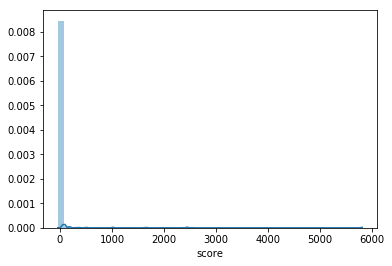

In [48]:
# Se vee una gran disproporcion, favoreciendo a puntajes bajos
sns.distplot(df['score']);

/opt/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/opt/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


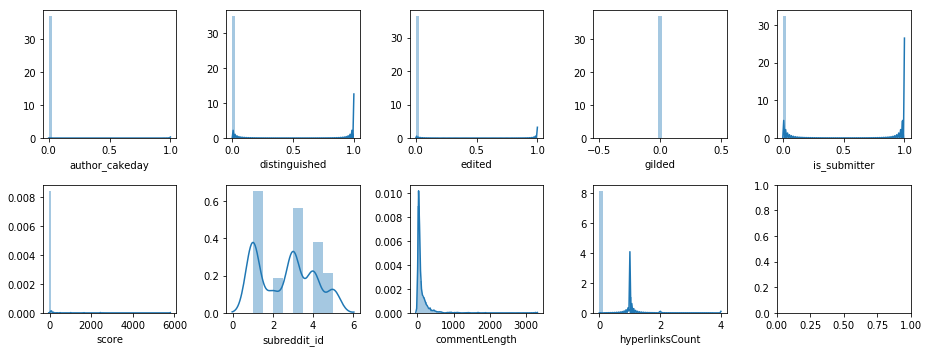

In [53]:
t = df.drop(['body'],axis=1)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(13,5))

for c,ax in zip(t, axes.flatten()):
    sns.distplot(t[c], ax=ax)
    
plt.tight_layout()

## División de data de entrenamiento, validación y  prueba

In [28]:
df.shape

(1381, 10)

In [29]:
comments = []
file_object  = open('sample_data.json') 
for line in file_object:
    comments.append(json.loads(line))

In [30]:
comments[458]

{'author': 'banterbeast',
 'author_flair_css_class': 'hibananew',
 'author_flair_text': 'mikke121 - XB1 Asia',
 'body': 'Drones should be kept the same to ensure consistency. If skins are introduced they could be detected by defenders more easily or blend into the environment more.',
 'can_gild': True,
 'controversiality': 0,
 'created_utc': 1506816014,
 'distinguished': None,
 'edited': False,
 'gilded': 0,
 'id': 'dnqike1',
 'is_submitter': False,
 'link_id': 't3_73i78p',
 'parent_id': 't3_73i78p',
 'permalink': '/r/Rainbow6/comments/73i78p/drone_skins_from_a_new_alpha_pack/dnqike1/',
 'retrieved_on': 1509189612,
 'score': 0,
 'stickied': False,
 'subreddit': 'Rainbow6',
 'subreddit_id': 't5_2t1bl'}

In [31]:
preprocComments = []
for item in comments:
    if(item['score']>=2 or item['score']<=-2):
        preprocComments.append(item)

In [32]:
len(preprocComments)

5196

In [33]:
groupedBySubR = {}
for item in preprocComments:
    if(item['subreddit'] not in groupedBySubR.keys()):
        newList = []
        newList.append(item)
        groupedBySubR[item['subreddit']] = newList
    else:
        groupedBySubR[item['subreddit']].append(item)

In [34]:
len(groupedBySubR)

1561

In [35]:
import nltk
nltk.download('reuters')

[nltk_data] Downloading package reuters to /home/alulab/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [36]:
from nltk.corpus import reuters
len(reuters.words())

1720901

In [37]:
files = [f for f in reuters.fileids() if 'training' in f]
corpus = [reuters.raw(fileids=[f]) for f in files]
len(corpus)

7769

In [38]:
corpus[0]

'BAHIA COCOA REVIEW\n  Showers continued throughout the week in\n  the Bahia cocoa zone, alleviating the drought since early\n  January and improving prospects for the coming temporao,\n  although normal humidity levels have not been restored,\n  Comissaria Smith said in its weekly review.\n      The dry period means the temporao will be late this year.\n      Arrivals for the week ended February 22 were 155,221 bags\n  of 60 kilos making a cumulative total for the season of 5.93\n  mln against 5.81 at the same stage last year. Again it seems\n  that cocoa delivered earlier on consignment was included in the\n  arrivals figures.\n      Comissaria Smith said there is still some doubt as to how\n  much old crop cocoa is still available as harvesting has\n  practically come to an end. With total Bahia crop estimates\n  around 6.4 mln bags and sales standing at almost 6.2 mln there\n  are a few hundred thousand bags still in the hands of farmers,\n  middlemen, exporters and processors.\n  

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [40]:
X = vectorizer.fit_transform(corpus)

In [41]:
X.shape

(7769, 26000)

In [42]:
type(X)

scipy.sparse.csr.csr_matrix